In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))


2.18.0
[]


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print("Number of training samples: ", len(X_train))
print("Number of testing samples: ", len(X_test))
print("Shape of an image:", X_train[0].shape)

Number of training samples:  60000
Number of testing samples:  10000
Shape of an image: (28, 28)


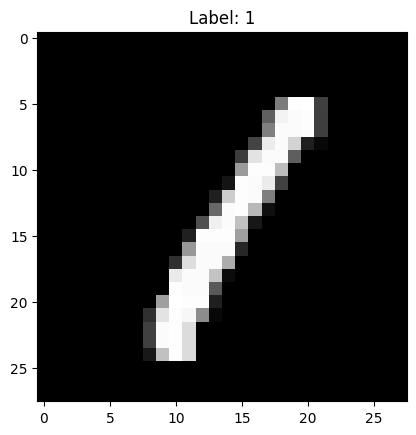

In [5]:
plt.imshow(X_train[3], cmap='gray')
plt.title(f"Label: {y_train[3]}")
plt.show()

In [6]:
# Normalize
# Always normalize pixel values when training neural networks on image data! 
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
model = Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation = "sigmoid"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

In [60]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9757 - loss: 0.0773 - val_accuracy: 0.9724 - val_loss: 0.0904
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9835 - loss: 0.0514 - val_accuracy: 0.9779 - val_loss: 0.0802
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9883 - loss: 0.0361 - val_accuracy: 0.9747 - val_loss: 0.0887
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9895 - loss: 0.0311 - val_accuracy: 0.9794 - val_loss: 0.0765
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9926 - loss: 0.0220 - val_accuracy: 0.9789 - val_loss: 0.0940


In [61]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.1128


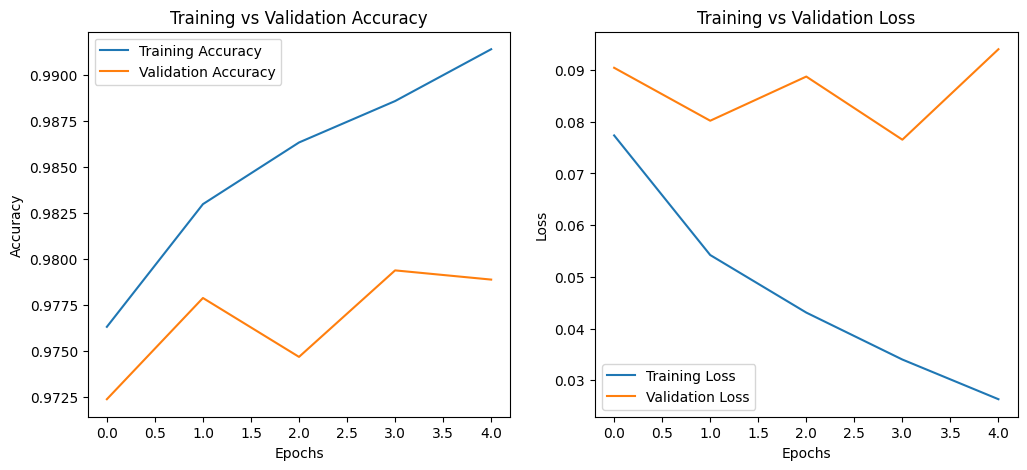

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

In [63]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


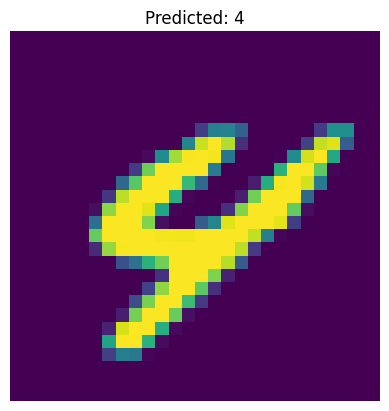

In [64]:
import random
index = random.randint(0, len(X_test) - 1)
plt.imshow(X_test[index])
plt.title(f"Predicted: {predicted_labels[index]}")
plt.axis("off")
plt.show()